Accuracy: 0.8452380952380952


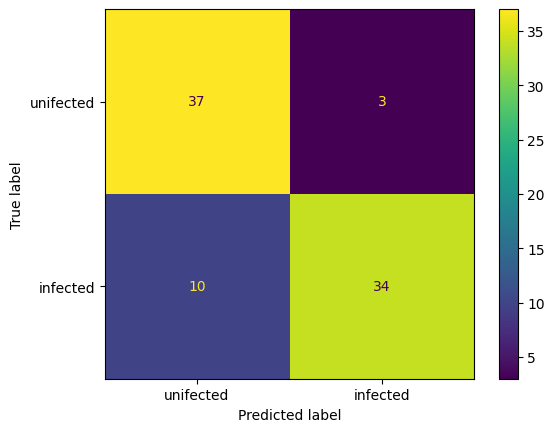

In [1]:
# Preprocessing Images
import cv2
import numpy as np
import os

def load_and_process_image(image_path, target_size=(128, 128)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Load image in grayscale
    img_resized = cv2.resize(img, target_size) # Resize image
    return img_resized

# Flatten the Image
def flatten_image(img):
    return img.flatten()

# Extract Features
def load_dataset(image_dir):
    images = []
    labels = []
    
    for label in ['infected', 'uninfected']:
        class_dir = os.path.join(image_dir, label)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = load_and_process_image(img_path)
            img_flat = flatten_image(img)
            images.append(img_flat)
            labels.append(0 if label == 'uninfected' else 1)
    return np.array(images), np.array(labels)

# Train-Test Split
from sklearn.model_selection import train_test_split

X, y = load_dataset(image_dir="/home/eaderogba279/Bionformatics_Projects/MP_Detection_ML/Dataset-20240708T092015Z-001/Dataset/Image Detection/Dataset/Train")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the Naives Bayes Classifier
# from sklearn.naive_bayes import GaussianNB

# model = GaussianNB()
# model.fit(X_train, y_train)

# Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

rf_classifier.fit(X_train, y_train)
label = ['unifected', 'infected']
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Making predictions
y_pred = rf_classifier.predict(X_test)
#y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# print('Classification Report:')
# print(classification_report(y_test, y_pred))
# print('Confusion Matrix:')
# print(confusion_matrix(y_test, y_pred))

# Create Confusion matrix plot
mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=label)
disp.plot()
plt.show()